In [602]:
%matplotlib inline

# importing libraries
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import cufflinks as cf
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import quandl
import plotly
import time

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from pandas.tseries.offsets import DateOffset
from IPython.display import Markdown, display
from matplotlib.ticker import FuncFormatter
from pandas.core.base import PandasObject
from datetime import datetime

pd.options.display.float_format = '{:,.3f}'.format

# Setting pandas dataframe display options
pd.set_option("display.max_rows", 20)
pd.set_option('display.width', 800)
pd.set_option('max_colwidth', 800)

# Set plotly offline
init_notebook_mode(connected=True)

# Set matplotlib style
plt.style.use('seaborn')

# Set cufflinks offline
cf.go_offline()

# Defining today's Date
from datetime import date
today = date.today()

import PortfolioAnalyser as pa

In [591]:
data = yf.download("SPY", start="1980-01-01", end="2020-04-30",
                   group_by="ticker")[['Adj Close']]

[*********************100%***********************]  1 of 1 downloaded


In [592]:
data.columns = ['SPY']

In [593]:
def compute_rolling_return(df, years):
    df2 = df.copy()
    df2.index = df.index - DateOffset(years=years)
    df2 = df2[df.index[0]:]

    merge = pa.merge_time_series(df, df2).ffill()
    merge.columns = ['-X Year', 'Price']
    merge.index = merge.index + DateOffset(years=years)
    merge['CAGR'] = (((merge['Price'] / merge['-X Year'])**(1/years)) - 1) * 100
    merge = pa.merge_time_series(merge, data, how='inner')
    merge = merge[~merge.index.duplicated()]
    
    return merge[['CAGR']]

In [594]:
# empty_df = pd.DataFrame(pd.date_range(start=data.index[0], end=data.index[-1]))
# empty_df.set_index(empty_df[0], inplace=True)
# empty_df

In [595]:
data[:'2017-04-29'].tail(10)

,SPY
Date,
2017-04-17,220.30
2017-04-18,219.65
2017-04-19,219.24
2017-04-20,221.03
2017-04-21,220.32
2017-04-24,222.75
2017-04-25,224.04
2017-04-26,223.90
2017-04-27,224.09


In [596]:
data.tail(10)

,SPY
Date,
2020-04-16,277.88
2020-04-17,285.38
2020-04-20,280.36
2020-04-21,271.84
2020-04-22,277.88
2020-04-23,277.86
2020-04-24,281.73
2020-04-27,285.79
2020-04-28,284.48


In [604]:
220.32 * 1.08042 ** 3

277.8636701496145

In [603]:
compute_rolling_return(data, years=3).loc['2020-04-23']

CAGR   8.042
Name: 2020-04-23 00:00:00, dtype: float64

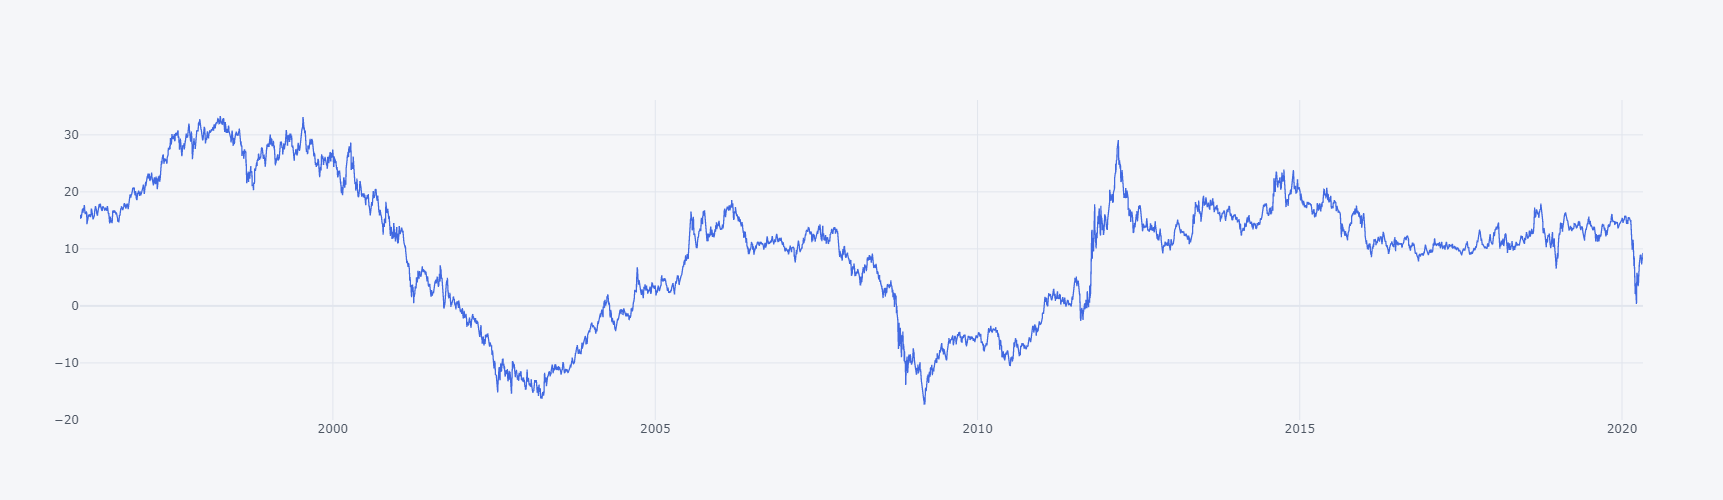

Wall time: 337 ms


In [597]:
%%time
compute_rolling_return(data, years=3).iplot(dimensions=pa.dimensions, color='royalblue')

In [ ]:
data